In [1]:
import os
import math
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nuscenes.nuscenes import NuScenes
from nuscenes.utils.splits import create_splits_scenes

In [234]:
with open('D:/Radar/Simple_BEV_v2/IOU_record_True.txt', 'r') as file:
        true_content = file.readlines()

with open('D:/Radar/Simple_BEV_v2/IOU_record_False.txt', 'r') as file:
    false_content = file.readlines()

iou_differences = []

for true_line, false_line in zip(true_content, false_content):
    true_parts = true_line.strip().split(', ')
    false_parts = false_line.strip().split(', ')

    true_batch_num, true_idx, true_iou = int(true_parts[0]), int(true_parts[1]), float(true_parts[2])
    false_batch_num, false_idx, false_iou = int(false_parts[0]), int(false_parts[1]), float(false_parts[2])

    
    if true_batch_num == false_batch_num and true_idx == false_idx:
        iou_difference = false_iou - true_iou # camera - camera+radar, if positive => radar make it worse
        if math.isnan(iou_difference):
            iou_difference=0
        iou_differences.append((true_batch_num, true_idx, iou_difference))

# Sort by IOU difference
iou_differences_sorted = sorted(iou_differences, key=lambda x: x[2], reverse=True)

# Load NuScenes
# nusc = NuScenes(version='v1.0-{}'.format('trainval'),
#                         dataroot=os.path.join('D:/Radar/nuscenes/'),
#                         verbose=False)
# scenes = create_splits_scenes()['val']
# all_samples = []
# for name in scenes:
#     target_scene = None
#     for scene in nusc.scene:
#         if scene['name'] == name:
#             target_scene = scene
#             break
#     if target_scene is not None:
#         sample_tokens = target_scene['first_sample_token']

#         while sample_tokens:
#             sample = nusc.get('sample', sample_tokens)
#             all_samples.append(sample)
#             sample_tokens = sample['next']
#     else:
#         print(f"No scene found with the name '{name}'.")

# Positive Elements
batch_size=32
pos_elements = [item for item in iou_differences_sorted if item[2] > 0]
sample_index = [batch_size * (batch_num-1) + idx for batch_num, idx, _ in pos_elements]

pos_rain = 0
pos_night = 0
pos_rainynight = 0
for _, i in enumerate(sample_index):
    sample_info = all_samples[i]
    if 'Rain' in nusc.get('scene', sample_info['scene_token'])['description'] or 'rain' in nusc.get('scene', sample_info['scene_token'])['description']:
        pos_rain += 1
        # print(nusc.get('scene', sample_info['scene_token'])['description'])
    if 'Night' in nusc.get('scene', sample_info['scene_token'])['description']:
        pos_night += 1
    if ('Rain' in nusc.get('scene', sample_info['scene_token'])['description'] or 'rain' in nusc.get('scene', sample_info['scene_token'])['description']) and 'Night' in nusc.get('scene', sample_info['scene_token'])['description']:
        pos_rainynight += 1
        pos_rain -= 1
        pos_night -= 1
print(f"Sample: {len(sample_index)}, Rain: {pos_rain}, Night: {pos_night}, RainyNight: {pos_rainynight}, ClearDay: {len(sample_index)-pos_rain-pos_night-pos_rainynight}")

# Negative Elements
neg_elements = [item for item in iou_differences_sorted if item[2] < 0]
sample_index = [batch_size * (batch_num-1) + idx for batch_num, idx, _ in neg_elements]

neg_rain = 0
neg_night = 0
neg_rainynight = 0
for _, i in enumerate(sample_index):
    sample_info = all_samples[i]
    if 'Rain' in nusc.get('scene', sample_info['scene_token'])['description'] or 'rain' in nusc.get('scene', sample_info['scene_token'])['description']:
        neg_rain += 1
    if 'Night' in nusc.get('scene', sample_info['scene_token'])['description']:
        neg_night += 1
    if ('Rain' in nusc.get('scene', sample_info['scene_token'])['description'] or 'rain' in nusc.get('scene', sample_info['scene_token'])['description']) and 'Night' in nusc.get('scene', sample_info['scene_token'])['description']:
        neg_rainynight += 1
        neg_rain -= 1
        neg_night -= 1
print(f"Sample: {len(sample_index)}, Rain: {neg_rain}, Night: {neg_night}, RainyNight: {neg_rainynight}, ClearDay: {len(sample_index)-neg_rain-neg_night-neg_rainynight}" )

Sample: 848, Rain: 149, Night: 67, RainyNight: 40, ClearDay: 592
Sample: 5003, Rain: 797, Night: 403, RainyNight: 74, ClearDay: 3729


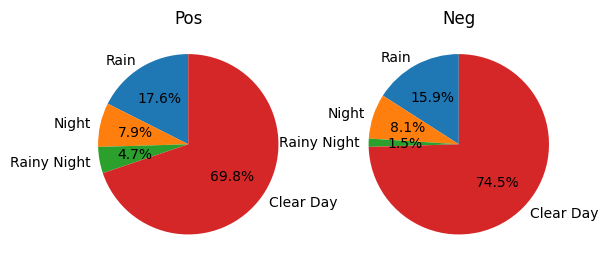

In [178]:
pos_labels = ['Rain', 'Night', 'Rainy Night', 'Clear Day']
pos_value = [149, 67, 40, 592]

neg_labels = ['Rain', 'Night', 'Rainy Night', 'Clear Day']
neg_value = [797, 403, 74, 3729]

plt.subplot(1, 2, 1)
plt.pie(pos_value, labels=pos_labels, autopct='%1.1f%%', startangle=90)
plt.title('Pos')

plt.subplot(1, 2, 2)
plt.pie(neg_value, labels=neg_labels, autopct='%1.1f%%', startangle=90)
plt.title('Neg')

plt.show()

In [211]:
with open('D:/Radar/Simple_BEV_v2/IOU_record_True.txt', 'r') as file:
        true_content = file.readlines()

with open('D:/Radar/Simple_BEV_v2/IOU_record_False.txt', 'r') as file:
    false_content = file.readlines()

iou_differences = []

for true_line, false_line in zip(true_content, false_content):
    true_parts = true_line.strip().split(', ')
    false_parts = false_line.strip().split(', ')

    true_batch_num, true_idx, true_iou = int(true_parts[0]), int(true_parts[1]), float(true_parts[2])
    false_batch_num, false_idx, false_iou = int(false_parts[0]), int(false_parts[1]), float(false_parts[2])

    
    if true_batch_num == false_batch_num and true_idx == false_idx:
        iou_difference = false_iou - true_iou # camera - camera+radar, if positive => radar make it worse
        if math.isnan(iou_difference):
            iou_difference=0
        iou_differences.append((true_batch_num, true_idx, iou_difference))

# Sort by IOU difference
iou_differences_sorted = sorted(iou_differences, key=lambda x: x[2], reverse=True)

# Load NuScenes
# nusc = NuScenes(version='v1.0-{}'.format('trainval'),
#                         dataroot=os.path.join('D:/Radar/nuscenes/'),
#                         verbose=False)
# scenes = create_splits_scenes()['val']
# all_samples = []
# for name in scenes:
#     target_scene = None
#     for scene in nusc.scene:
#         if scene['name'] == name:
#             target_scene = scene
#             break
#     if target_scene is not None:
#         sample_tokens = target_scene['first_sample_token']

#         while sample_tokens:
#             sample = nusc.get('sample', sample_tokens)
#             all_samples.append(sample)
#             sample_tokens = sample['next']
#     else:
#         print(f"No scene found with the name '{name}'.")

# Positive Elements
batch_size=32
pos_elements = [item for item in iou_differences_sorted if item[2] > 0]
sample_index = [batch_size * (batch_num-1) + idx for batch_num, idx, _ in pos_elements]
pos_count_dict = {}
for _, i in enumerate(sample_index):
    sample_info = all_samples[i]
    elements=nusc.get('scene', sample_info['scene_token'])['description'].strip().split(', ')
    for element in elements:
        if element in pos_count_dict:
            pos_count_dict[element] += 1
        else:
            pos_count_dict[element] = 1
# print(dict(sorted(pos_count_dict.items(), key=lambda item: item[1],reverse=True)))
            
# Negative Elements
neg_elements = [item for item in iou_differences_sorted if item[2] < 0]
sample_index = [batch_size * (batch_num-1) + idx for batch_num, idx, _ in neg_elements]
neg_count_dict = {}
for _, i in enumerate(sample_index):
    sample_info = all_samples[i]
    elements=nusc.get('scene', sample_info['scene_token'])['description'].strip().split(', ')
    for element in elements:
        if element in neg_count_dict:
            neg_count_dict[element] += 1
        else:
            neg_count_dict[element] = 1

(-0.5, 399.5, 199.5, -0.5)

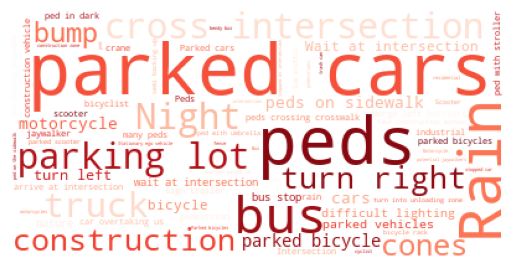

In [212]:
pos_wc = WordCloud(
    background_color='white',
    colormap='Reds')

pos_wc_img = pos_wc.generate_from_frequencies(pos_count_dict)
plt.imshow(pos_wc_img)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

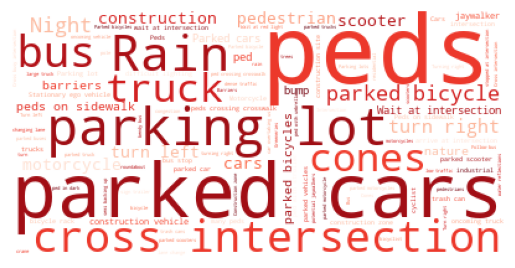

In [213]:
neg_wc = WordCloud(
    background_color='white',
    colormap='Reds')

neg_wc_img = neg_wc.generate_from_frequencies(neg_count_dict)
plt.imshow(neg_wc_img)
plt.axis('off')

In [214]:
print(dict(sorted(pos_count_dict.items(), key=lambda item: item[1],reverse=True)))

{'parked cars': 228, 'peds': 193, 'Rain': 157, 'bus': 110, 'cross intersection': 109, 'Night': 107, 'parking lot': 105, 'truck': 101, 'turn right': 78, 'construction': 76, 'cones': 72, 'bump': 63, 'parked bicycle': 62, 'cars': 54, 'motorcycle': 53, 'peds on sidewalk': 51, 'turn left': 46, 'Wait at intersection': 45, 'bicycle': 44, 'difficult lighting': 44, 'parked vehicles': 42, 'nature': 37, 'wait at intersection': 35, 'bus stop': 35, 'peds crossing crosswalk': 34, 'crane': 33, 'industrial': 33, 'arrive at intersection': 32, 'barriers': 30, 'car overtaking us': 30, 'construction vehicle': 29, 'scooter': 29, 'jaywalker': 28, 'Intersection': 28, 'sign trailer': 27, 'bicyclist': 27, 'many peds': 26, 'Parked cars': 26, 'parked bicycles': 25, 'pedestrian': 24, 'ped with stroller': 23, 'Peds': 23, 'rain': 23, 'ped in dark': 23, 'Merge left': 22, 'turn into unloading zone': 22, 'low traffic': 22, 'ped crossing crosswalk': 22, 'ped with umbrella': 21, 'bicycle rack': 21, 'Scooter': 20, 'fake 

In [215]:
print(dict(sorted(neg_count_dict.items(), key=lambda item: item[1],reverse=True)))

{'peds': 1325, 'parked cars': 1303, 'parking lot': 852, 'Rain': 783, 'cross intersection': 598, 'bus': 597, 'cones': 491, 'truck': 490, 'parked bicycle': 489, 'Night': 477, 'turn right': 431, 'construction': 308, 'pedestrian': 294, 'scooter': 287, 'turn left': 275, 'cars': 260, 'motorcycle': 258, 'peds on sidewalk': 246, 'parked bicycles': 244, 'nature': 242, 'barriers': 241, 'Wait at intersection': 233, 'Parked cars': 229, 'ped': 218, 'bump': 211, 'construction vehicle': 211, 'jaywalker': 208, 'peds crossing crosswalk': 202, 'parked scooter': 183, 'Parking lot': 174, 'construction zone': 171, 'industrial': 168, 'wait at intersection': 166, 'bus stop': 164, 'arrive at intersection': 160, 'Stationary ego vehicle': 140, 'Peds': 131, 'bicycle rack': 129, 'many peds': 125, 'cyclist': 120, 'intersection': 118, 'parked vehicles': 117, 'trucks': 111, 'difficult lighting': 110, 'parked car': 108, 'construction site': 108, 'oncoming truck': 108, 'Peds on sidewalk': 107, 'Motorcycle': 104, 'tras

# Bin으로 나누어 보기

In [243]:
with open('D:/Radar/Simple_BEV_v2/IOU_record_True.txt', 'r') as file:
        true_content = file.readlines()

with open('D:/Radar/Simple_BEV_v2/IOU_record_False.txt', 'r') as file:
    false_content = file.readlines()

iou_differences = []

for true_line, false_line in zip(true_content, false_content):
    true_parts = true_line.strip().split(', ')
    false_parts = false_line.strip().split(', ')

    true_batch_num, true_idx, true_iou = int(true_parts[0]), int(true_parts[1]), float(true_parts[2])
    false_batch_num, false_idx, false_iou = int(false_parts[0]), int(false_parts[1]), float(false_parts[2])

    
    if true_batch_num == false_batch_num and true_idx == false_idx:
        iou_difference = false_iou - true_iou # camera - camera+radar, if positive => radar make it worse
        if math.isnan(iou_difference):
            iou_difference=0
        iou_differences.append((true_batch_num, true_idx, iou_difference))

# Sort by IOU difference
iou_differences_sorted = sorted(iou_differences, key=lambda x: x[2], reverse=True)

# Load NuScenes
# nusc = NuScenes(version='v1.0-{}'.format('trainval'),
#                         dataroot=os.path.join('D:/Radar/nuscenes/'),
#                         verbose=False)
# scenes = create_splits_scenes()['val']
# all_samples = []
# for name in scenes:
#     target_scene = None
#     for scene in nusc.scene:
#         if scene['name'] == name:
#             target_scene = scene
#             break
#     if target_scene is not None:
#         sample_tokens = target_scene['first_sample_token']

#         while sample_tokens:
#             sample = nusc.get('sample', sample_tokens)
#             all_samples.append(sample)
#             sample_tokens = sample['next']
#     else:
#         print(f"No scene found with the name '{name}'.")

threshold = math.floor(max(iou_differences_sorted, key=lambda x: x[2])[2]/10) * 10
while threshold >= math.floor(min(iou_differences_sorted, key=lambda x: x[2])[2]/10) * 10:
    elements = [item for item in iou_differences_sorted if item[2] >= threshold and item[2] < threshold+20]
    sample_index = [batch_size * (batch_num-1) + idx for batch_num, idx, _ in elements]
    rain = 0
    night = 0
    rainynight = 0
    for _, i in enumerate(sample_index):
        sample_info = all_samples[i]
        if 'Rain' in nusc.get('scene', sample_info['scene_token'])['description'] or 'rain' in nusc.get('scene', sample_info['scene_token'])['description']:
            rain += 1
            # print(nusc.get('scene', sample_info['scene_token'])['description'])
        if 'Night' in nusc.get('scene', sample_info['scene_token'])['description']:
            night += 1
        if ('Rain' in nusc.get('scene', sample_info['scene_token'])['description'] or 'rain' in nusc.get('scene', sample_info['scene_token'])['description']) and 'Night' in nusc.get('scene', sample_info['scene_token'])['description']:
            rainynight += 1
            rain -= 1
            night -= 1
    print(f"Threshold: {threshold}")
    print(f"Sample: {len(elements)}, Rain: {rain}, Night: {night}, RainyNight: {rainynight}, ClearDay: {len(elements)-rain-night-rainynight}")
    labels = ['Rain', 'Night', 'Rainy Night', 'Clear Day']
    value = [rain, night, rainynight, len(elements)-rain-night-rainynight]
    plt.pie(value, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(f'Samples={len(elements)}, threshold={threshold}')
    plt.savefig(f'D:/Radar/Figure/Samples={len(elements)}, threshold_{threshold}.jpg')
    plt.clf()
    threshold -=20

Threshold: 60
Sample: 1, Rain: 1, Night: 0, RainyNight: 0, ClearDay: 0
Threshold: 40
Sample: 2, Rain: 2, Night: 0, RainyNight: 0, ClearDay: 0
Threshold: 20
Sample: 34, Rain: 3, Night: 5, RainyNight: 0, ClearDay: 26
Threshold: 0
Sample: 976, Rain: 165, Night: 71, RainyNight: 46, ClearDay: 694
Threshold: -20
Sample: 4287, Rain: 685, Night: 320, RainyNight: 59, ClearDay: 3223
Threshold: -40
Sample: 649, Rain: 104, Night: 66, RainyNight: 12, ClearDay: 467
Threshold: -60
Sample: 54, Rain: 4, Night: 14, RainyNight: 3, ClearDay: 33
Threshold: -80
Sample: 13, Rain: 4, Night: 3, RainyNight: 0, ClearDay: 6


<Figure size 640x480 with 0 Axes>